In [100]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff

In [101]:
pip install statsmodels

In [102]:
pip install openpyxl

# Data Exploration and Cleaning

In [103]:
df = pd.read_excel('Ecommerce Pharmacy.xlsx')

In [104]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Store ID              9000 non-null   object        
 1   Customer Type         9000 non-null   object        
 2   Invoice Type          9000 non-null   object        
 3   Customer Country      9000 non-null   object        
 4   Customer City         9000 non-null   object        
 5   Customer Gender       9000 non-null   object        
 6   Invoice Date          9000 non-null   datetime64[ns]
 7   Product ID            9000 non-null   int64         
 8   Product Name          9000 non-null   object        
 9   Product Price         9000 non-null   object        
 10  Product Category      9000 non-null   object        
 11  Product Brand         9000 non-null   object        
 12  Product Availability  9000 non-null   object        
 13  Invo

In [105]:
# Display the first ten rows
df.head(10)

,Store ID,Customer Type,Invoice Type,Customer Country,Customer City,Customer Gender,Invoice Date,Product ID,Product Name,Product Price,Product Category,Product Brand,Product Availability,Invoice Items' Count,Item QTY per Invoice
0,Branch0195,E-commerce,Reservation,Saudi Arabia,Riyadh,Male,2024-11-19,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,1
1,Branch0195,E-commerce,Reservation,EG,Riyadh,Male,2024-11-23,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,1
2,Branch0195,E-commerce,Reservation,EG,Riyadh,Male,2024-11-27,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,2
3,Branch0195,E-commerce,Reservation,EG,Riyadh,Male,2024-11-29,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,2
4,Branch0195,E-commerce,Reservation,EG,Riyadh,Male,2024-12-01,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,2
5,Branch0217,E-commerce,Reservation,EG,Riyadh,Male,2024-11-07,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,1
6,Branch0741,E-commerce,Reservation,EG,Riyadh,Male,2024-12-01,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,2
7,Branch1255,E-commerce,Reservation,EG,Riyadh,Male,2024-12-01,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,2
8,Branch1255,E-commerce,Reservation,EG,Riyadh,Female,2024-12-03,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,1
9,Branch1275,E-commerce,Reservation,EG,Riyadh,Male,2024-11-27,27664791,BABY JOY Product 27664791,90.18 SR,DIPR,BABY JOY,In Stock,1,1


In [106]:
# Check for missing values
df.isnull().sum()

Store ID                0
Customer Type           0
Invoice Type            0
Customer Country        0
Customer City           0
Customer Gender         0
Invoice Date            0
Product ID              0
Product Name            0
Product Price           0
Product Category        0
Product Brand           0
Product Availability    0
Invoice Items' Count    0
Item QTY per Invoice    0
dtype: int64

In [107]:
# Check for duplicates
df.duplicated().sum()

np.int64(4)

In [108]:
# Display Columns
df.columns

Index(['Store ID', 'Customer Type', 'Invoice Type', 'Customer Country',
       'Customer City', 'Customer Gender', 'Invoice Date', 'Product ID',
       'Product Name', 'Product Price', 'Product Category', 'Product Brand',
       'Product Availability', 'Invoice Items' Count', 'Item QTY per Invoice'],
      dtype='object')

In [109]:
# Display descriptive statistics
df.describe()

,Invoice Date,Product ID,Invoice Items' Count,Item QTY per Invoice
count,9000,9.000000e+03,9000.000000,9000.000000
mean,2024-11-22 01:04:19.200000,2.275061e+07,1.027444,1.428556
min,2024-11-07 00:00:00,1.404240e+07,1.000000,1.000000
25%,2024-11-14 00:00:00,2.071677e+07,1.000000,1.000000
50%,2024-11-23 00:00:00,2.074368e+07,1.000000,1.000000
75%,2024-11-29 00:00:00,2.766465e+07,1.000000,2.000000
max,2024-12-07 00:00:00,3.514625e+07,4.000000,16.000000
std,NaN,4.983169e+06,0.180817,1.008468


In [110]:
# unique values in each column:
for col in df.columns:
    print(f"column name: '{col}':")
    print(df[col].unique())
    print("\n")

column name: 'Store ID':
['Branch0195' 'Branch0217' 'Branch0741' 'Branch1255' 'Branch1275'
 'Branch0036' 'Branch0047' 'Branch0054' 'Branch0131' 'Branch0148'
 'Branch0164' 'Branch0191' 'Branch0286' 'Branch0769' 'Branch1262'
 'Branch1265' 'Branch1271' 'Branch0027' 'Branch0046' 'Branch0067'
 'Branch0103' 'Branch0196' 'Branch0340' 'Branch0762' 'Branch0778'
 'Branch1230' 'Branch1281' 'Branch0033' 'Branch0139' 'Branch0178'
 'Branch0289' 'Branch0290' 'Branch0365' 'Branch0385' 'Branch0386'
 'Branch0734' 'Branch1243' 'Branch1246' 'Branch0035' 'Branch0118'
 'Branch0119' 'Branch0227' 'Branch0366' 'Branch0374' 'Branch0392'
 'Branch0394' 'Branch0726' 'Branch0795' 'Branch1220' 'Branch0097'
 'Branch0230' 'Branch0315' 'Branch0352' 'Branch0399' 'Branch0720'
 'Branch0753' 'Branch0761' 'Branch0765' 'Branch1217' 'Branch1250'
 'Branch0091' 'Branch0092' 'Branch0093' 'Branch0094' 'Branch0095'
 'Branch0096' 'Branch0098' 'Branch0099' 'Branch0102' 'Branch0122'
 'Branch0123' 'Branch0163' 'Branch0228' 'Branch0396

In [111]:
# Mapping for the country codes to full names
country_mapping = {
    'SA': 'Saudi Arabia',
    'YE': 'Yemen',
    'JO': 'Jordan',
    'BH': 'Bahrain',
    'Bahrin': 'Bahrain', 
    'PK': 'Pakistan',
    'BD': 'Bangladesh',
    'IN': 'India',
    'SY': 'Syria',
    'KW': 'Kuwait',
    'EG': 'Egypt',
    'SD': 'Sudan',
}

def map_country_name(country):
    country = country.strip()  
    return country_mapping.get(country, country)  

df['Customer Country'] = df['Customer Country'].apply(map_country_name)

df['Customer Country'].unique()

array(['Saudi Arabia', 'Egypt', 'Yemen', 'Bangladesh', 'Jordan', 'Syria',
       'Bahrain', 'India', 'Kuwait', 'Pakistan', 'Sudan', 'Iraq'],
      dtype=object)

In [112]:
# Mapping for gender values
gender_mapping = {
    'M': 'Male',
    'F': 'Female',
    'Male': 'Male',
    'Female': 'Female'}

def map_gender(gender):
    gender = gender.strip()  
    return gender_mapping.get(gender, gender)  

df['Customer Gender'] = df['Customer Gender'].apply(map_gender)

df['Customer Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [113]:
df['Product Price'] = df['Product Price'].apply(lambda x: float(str(x).replace('SR', '').replace('SAR', '').strip()) 
                                                if isinstance(x, str) else float(x))
df['Product Price'].unique()

array([ 90.18,  75.85,  37.  ,  77.11,  39.13,  80.81,  39.78,  83.89,
        85.83,  36.1 , 161.57,  80.  ,  40.81,  43.21,  73.6 , 173.88,
        26.07,  89.22,  38.87,  75.65,  86.06,   9.  ,  28.55,  30.44,
        41.76,  60.  ,  15.  ,  43.44,  25.  , 151.65,  94.04, 173.75,
        72.  ,  86.05,  60.87,  80.66, 155.47,  15.61,  43.  ,  19.09,
        77.  ,  43.24,  76.18,  75.1 ,  28.  ,  43.05, 156.51,  91.3 ,
        39.85,  81.6 ,  40.13,  86.91,  55.85,   5.51,  14.49,  29.61,
        64.  ,  32.  ,  39.5 ,  59.51, 172.11,  12.71, 113.05,  40.  ,
        22.25,  61.83,  26.  , 103.42,  16.52,  15.5 ,  43.28,  75.06,
        42.5 ,  34.  ,  67.98,  70.85,  45.  ,  89.94,  76.45,  61.67,
        47.8 ,  27.17,  89.95,  39.09, 168.06,  65.  ,  68.71,  78.93,
        30.43,  29.5 ,  19.13, 106.26,  58.67, 123.01,   6.  ,  90.75,
        89.67,   3.5 ,  57.4 ,  43.66,  39.4 ,  45.23,  26.52,  17.18,
        55.65,  24.  ])

In [114]:
df['Currency'] = df['Product Price'].apply(lambda x: 'SAR' if 'SR' in str(x) or 'SAR' in str(x) else 'SAR')
df.head()

,Store ID,Customer Type,Invoice Type,Customer Country,Customer City,Customer Gender,Invoice Date,Product ID,Product Name,Product Price,Product Category,Product Brand,Product Availability,Invoice Items' Count,Item QTY per Invoice,Currency
0,Branch0195,E-commerce,Reservation,Saudi Arabia,Riyadh,Male,2024-11-19,27664791,BABY JOY Product 27664791,90.18,DIPR,BABY JOY,In Stock,1,1,SAR
1,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-11-23,27664791,BABY JOY Product 27664791,90.18,DIPR,BABY JOY,In Stock,1,1,SAR
2,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-11-27,27664791,BABY JOY Product 27664791,90.18,DIPR,BABY JOY,In Stock,1,2,SAR
3,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-11-29,27664791,BABY JOY Product 27664791,90.18,DIPR,BABY JOY,In Stock,1,2,SAR
4,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-12-01,27664791,BABY JOY Product 27664791,90.18,DIPR,BABY JOY,In Stock,1,2,SAR


In [115]:
# Mapping for Product Category

def map_category(category):
    category_mapping = {
        'DIPR': 'Diapers',
        'MLK': 'Milk',
        'BBC': 'Baby Care',
        'HC': 'Hair Care',
    }
    
    return category_mapping.get(category.strip(), category) 
    
df['Product Category'] = df['Product Category'].apply(map_category)
df['Product Category'].unique()

array(['Diapers', 'Milk', 'Food', 'Baby Care', 'Hair Care'], dtype=object)

In [116]:
# Display Columns
df.columns

Index(['Store ID', 'Customer Type', 'Invoice Type', 'Customer Country',
       'Customer City', 'Customer Gender', 'Invoice Date', 'Product ID',
       'Product Name', 'Product Price', 'Product Category', 'Product Brand',
       'Product Availability', 'Invoice Items' Count', 'Item QTY per Invoice',
       'Currency'],
      dtype='object')

In [117]:
df.rename(columns={"Invoice Items' Count": "Invoice Items Count"}, inplace=True)

In [118]:
df['Month'] = df['Invoice Date'].dt.month

In [119]:
df['Day'] = df['Invoice Date'].dt.date

In [120]:
df['Total Sales'] = df['Product Price'] * df['Item QTY per Invoice']
df.head()

,Store ID,Customer Type,Invoice Type,Customer Country,Customer City,Customer Gender,Invoice Date,Product ID,Product Name,Product Price,Product Category,Product Brand,Product Availability,Invoice Items Count,Item QTY per Invoice,Currency,Month,Day,Total Sales
0,Branch0195,E-commerce,Reservation,Saudi Arabia,Riyadh,Male,2024-11-19,27664791,BABY JOY Product 27664791,90.18,Diapers,BABY JOY,In Stock,1,1,SAR,11,2024-11-19,90.18
1,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-11-23,27664791,BABY JOY Product 27664791,90.18,Diapers,BABY JOY,In Stock,1,1,SAR,11,2024-11-23,90.18
2,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-11-27,27664791,BABY JOY Product 27664791,90.18,Diapers,BABY JOY,In Stock,1,2,SAR,11,2024-11-27,180.36
3,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-11-29,27664791,BABY JOY Product 27664791,90.18,Diapers,BABY JOY,In Stock,1,2,SAR,11,2024-11-29,180.36
4,Branch0195,E-commerce,Reservation,Egypt,Riyadh,Male,2024-12-01,27664791,BABY JOY Product 27664791,90.18,Diapers,BABY JOY,In Stock,1,2,SAR,12,2024-12-01,180.36


# Data Analysis and Visualisation

### 1. What is the distribution of product prices?

In [121]:
px.histogram(df, x='Product Price', title='Distribution of Product Prices')

### 2. What is the average price of products by product category?

In [122]:
avg_price_category = df.groupby('Product Category')['Product Price'].mean().reset_index()
px.bar(avg_price_category, x='Product Category', y='Product Price', title='Average Product Price by Category')

### 3. What is the sales value for each product category?

In [123]:
sales_by_category = df.groupby('Product Category')['Total Sales'].sum().reset_index()
px.bar(sales_by_category, x='Product Category', y='Total Sales', title='Total Sales by Product Category')

### 4. What is the total number of items sold for each product?

In [124]:
sales_by_product = df.groupby('Product Name')['Item QTY per Invoice'].sum().reset_index()
px.bar(sales_by_product, x='Product Name', y='Item QTY per Invoice', title='Total Quantity Sold per Product')

### 5. What is the total sales for each product brand?

In [125]:
avg_price_brand = df.groupby('Product Brand')['Total Sales'].sum().reset_index()
px.bar(avg_price_brand, x='Product Brand', y='Total Sales', title='Total Sales by Brand')

### 6. How does product availability impact sales?

In [126]:
sales_by_availability = df.groupby('Product Availability')['Invoice Items Count'].sum().reset_index()
px.bar(sales_by_availability, x='Product Availability', y='Invoice Items Count', title='Sales by Product Availability')

### 7. What is the relationship between product price and the number of items sold?

In [127]:
px.scatter( df,x='Product Price', y='Item QTY per Invoice',
    title='Relationship Between Product Price and Number of Items Sold',
    labels={'Product Price': 'Product Price (SAR)', 'Item QTY per Invoice': 'Items Sold'},
    color='Product Category',  
    size='Item QTY per Invoice' )

### 8. What is the total quantity sold by product category?

In [128]:
quantity_by_category = df.groupby('Product Category')['Item QTY per Invoice'].sum().reset_index()
px.bar(quantity_by_category, x='Product Category', y='Item QTY per Invoice', title='Total Quantity Sold by Category')

### 9. What is the breakdown of products sold by country?

In [129]:
product_sales_by_country = df.groupby(['Customer Country', 'Product Name'])['Invoice Items Count'].sum().reset_index()
px.bar(product_sales_by_country, x='Customer Country', y='Invoice Items Count', color='Product Name', title='Product Sales by Country')

### 10. What is the distribution of product sales across different Product Categories?

In [130]:
sales_by_product_type = df.groupby('Product Category')['Invoice Items Count'].sum().reset_index()
px.pie(sales_by_product_type, names='Product Category', values='Invoice Items Count', title='Sales Distribution by Product Category')

In [131]:
category_sales = df.groupby('Product Category')['Total Sales'].sum().reset_index()

px.bar(category_sales,
    x='Product Category',
    y='Total Sales',
    title='Total Sales by Product Category',
    labels={'Product Category': 'Category', 'Total Sales': 'Total Sales (SAR)'},
    text='Total Sales')

### 11. What is the average number of items per invoice by product category?

In [132]:
avg_items_by_category = df.groupby('Product Category')['Item QTY per Invoice'].mean().reset_index()
px.bar(avg_items_by_category, x='Product Category', y='Item QTY per Invoice', title='Average Items per Invoice by Product Category')

### 12. Top 5 Products with the Highest Demand (Based on Quantity Sold)

In [133]:
top_products = ( df.groupby('Product Name')['Item QTY per Invoice'] .sum() .sort_values(ascending=False) .head(5) .reset_index())

px.bar(top_products,
    x='Product Name',
    y='Item QTY per Invoice',
    title='Top 5 Products with the Highest Demand',
    labels={'Item QTY per Invoice': 'Quantity Sold', 'Product Name': 'Product'},
    color='Item QTY per Invoice', 
    text='Item QTY per Invoice' )

### 13. What is the distribution of product sales across customer gender?

In [134]:
gender_sales = (df.groupby('Customer Gender')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False))

# Percentage contribution for each gender (optional)
gender_sales['Percentage'] = (gender_sales['Total Sales'] / gender_sales['Total Sales'].sum() * 100)

px.pie(gender_sales,
    names='Customer Gender',
    values='Total Sales',
    title="Distribution of Product Sales Across Customer Gender",
    labels={'Total Sales': 'Sales'})

### 14. What is the trend of sales over time by day?

In [135]:
daily_sales = df.groupby('Day')['Total Sales'].sum().reset_index()
px.line(daily_sales, x='Day', y='Total Sales', title='Trend of Sales Over Time by Day')

### 15. How do sales vary by customer country?

In [136]:
sales_by_country = df.groupby('Customer Country')['Invoice Items Count'].sum().reset_index()
px.bar(sales_by_country, x='Customer Country', y='Invoice Items Count', title='Sales by Customer Country')

### 16. What is the distribution of customer cities?

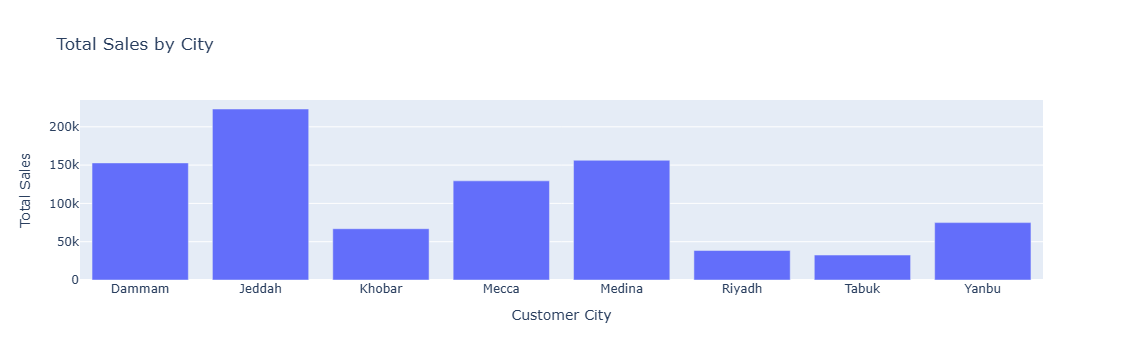

In [137]:
sales_by_city = df.groupby('Customer City')['Total Sales'].sum().reset_index()
px.bar(sales_by_city, x='Customer City', y='Total Sales', title='Total Sales by City')

In [138]:
city_distribution = df['Customer City'].value_counts().reset_index()
city_distribution.columns = ['City', 'Count']
px.pie(city_distribution, names='City', values='Count', title='Customer Distribution by City')

### 17. What is the Average Sales Per Order for Each Customer Type?

In [139]:
sales_per_order = (
    df.groupby('Customer Type')['Total Sales']
    .mean()
    .reset_index()
    .sort_values(by='Total Sales', ascending=False))

sales_per_order.rename(columns={'Total Sales': 'Avg Sales Per Order'}, inplace=True)

px.bar(sales_per_order,
    x='Customer Type',
    y='Avg Sales Per Order',
    title="Average Sales Per Order for Each Customer Type",
    text='Avg Sales Per Order',
    color='Customer Type')

### 18. What is the total sales for each customer type?

In [140]:
total_sales_customer_type = (df.groupby('Customer Type')['Total Sales'].sum().reset_index()
    .sort_values(by='Total Sales', ascending=False))

px.bar(
    total_sales_customer_type,
    x='Customer Type',
    y='Total Sales',
    title="Total Sales for Each Customer Type",
    labels={'Total Sales': 'Total Sales (SAR)', 'Customer Type': 'Customer Type'},
    text='Total Sales',
    color='Customer Type')

### 19. What is the sales distribution by invoice type?

In [141]:
sales_by_invoice_type = df.groupby('Invoice Type')['Invoice Items Count'].sum().reset_index()
px.bar(sales_by_invoice_type, x='Invoice Type', y='Invoice Items Count', title='Sales by Invoice Type')

In [142]:
sales_by_invoice_type = df.groupby('Invoice Type')['Total Sales'].sum().reset_index()
px.bar(sales_by_invoice_type, x='Invoice Type', y='Total Sales', title='Sales by Invoice Type')

In [143]:
invoice_type_sales = df.groupby('Invoice Type')['Total Sales'].sum().reset_index()
px.pie(invoice_type_sales, names='Invoice Type', values='Total Sales', title='Sales by Invoice Type')

### 20. How does Invoice Items Count change with customer type?

In [144]:
sales_by_customer_type = df.groupby('Customer Type')['Invoice Items Count'].sum().reset_index()
px.bar(sales_by_customer_type, x='Customer Type', y='Invoice Items Count', title='Sales by Customer Type')

### 21. What is the breakdown of sales by customer gender?

In [145]:
sales_by_gender = df.groupby('Customer Gender')['Invoice Items Count'].sum().reset_index()
px.bar(sales_by_gender, x='Customer Gender', y='Invoice Items Count', title='Sales by Customer Gender')

### 22. What is the distribution of the number of items per invoice?

In [146]:
px.histogram(df, x='Item QTY per Invoice', title='Distribution of Items per Invoice')

### 23. What is the sales performance for each store?

In [147]:
sales_by_store = df.groupby('Store ID')['Invoice Items Count'].sum().reset_index()
px.bar(sales_by_store, x='Store ID', y='Invoice Items Count', title='Sales by Store')

### 24. Top 5 Days with the Highest Total Sales

In [148]:
top_5_days_sales = df.groupby('Day')['Total Sales'].sum().reset_index()
top_5_days_sales = top_5_days_sales.sort_values(by='Total Sales', ascending=False).head(5)
px.bar(top_5_days_sales, x='Day', y='Total Sales', title='Top 5 Days with Highest Total Sales')

### 25. Top 5 Customer Countries by Total Sales

In [149]:
country_sales = df.groupby('Customer Country')['Total Sales'].sum().reset_index()
country_sales = country_sales.sort_values(by='Total Sales', ascending=False).head(5)
px.bar(country_sales, x='Customer Country', y='Total Sales', title='Top 5 Countries by Total Sales')

### 26. Total Sales by Customer Type and Country

In [150]:
customer_country_sales = df.groupby(['Customer Country', 'Customer Type'])['Total Sales'].sum().reset_index()

px.bar(
    customer_country_sales,
    x='Customer Country',
    y='Total Sales',
    color='Customer Type',
    title='Total Sales by Customer Type and Country',
    barmode='group')


### 27. Sales Trend Over Time by Product Category

In [151]:
category_trend = df.groupby(['Invoice Date', 'Product Category'])['Total Sales'].sum().reset_index()

px.line(category_trend,
    x='Invoice Date',
    y='Total Sales',
    color='Product Category',
    title='Sales Trend Over Time by Product Category')

### 28. Product Category Demand by Customer Gender

In [152]:
category_gender_demand = df.groupby(['Product Category', 'Customer Gender'])['Item QTY per Invoice'].sum().reset_index()

px.bar(category_gender_demand,
    x='Product Category',
    y='Item QTY per Invoice',
    color='Customer Gender',
    title='Product Category Demand by Customer Gender',
    barmode='group')


### 29.Total Sales by Product Category in Each City.

In [153]:
    category_city_sales = df.groupby(['Customer City', 'Product Category'])['Total Sales'].sum().reset_index()
     
    px.bar(
    category_city_sales,
    x='Customer City',
    y='Total Sales',
    color='Product Category',
    title='Total Sales by Product Category in Each City',
    barmode='group')

# Stramlit Dashboard

In [154]:
import pandas as pd

Cleaned_Data = 'cleaned_data.xlsx'

df.to_excel(Cleaned_Data, index=False)

In [155]:
%%writefile Dashboard.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load the cleaned data
df = pd.read_excel('cleaned_data.xlsx') 

# Sidebar for navigation
st.sidebar.title("Navigation")
options = st.sidebar.radio(
    "Go to:",
    [
        "Overview",
        "Sales by Product Category",
        "Sales by Product Category in Each City", 
        "Top Products by Demand in Each Category",
        "Category Demand by Gender",
        "Sales by Customer Gender",
        "Sales Trend Over Time",
        "Top Sales Days",
        "Product Price vs Quantity Sold",
        "Correlation Analysis",
        "Sales by Customer Type",
        "Sales Per Order by Customer Type",
        "Sales by Invoice Type",
        "Sales Across Stores",
        "Sales by Product Availability",
        "Sales by Customer Country",
        "Sales by Customer City",])

# Dashboard Title
st.title("E-commerce Pharmacy Dashboard")
st.markdown("This dashboard visualizes key insights and analyses from the dataset.")

# Visualizations based on selection
if options == "Overview":
    st.header("Overview")
    st.write("This section gives an overview of the dataset. Select any analysis from the sidebar to view its details.")
    st.dataframe(df.head(10))

elif options == "Sales by Product Category":
    category_sales = df.groupby('Product Category')['Total Sales'].sum().reset_index()
    fig = px.bar(category_sales, x='Product Category', y='Total Sales', title='Total Sales by Product Category')
    st.plotly_chart(fig)
    
    category_trend = df.groupby(['Invoice Date', 'Product Category'])['Total Sales'].sum().reset_index()
    fig_2 = px.line(category_trend,
    x='Invoice Date',
    y='Total Sales',
    color='Product Category',
    title='Sales Trend Over Time by Product Category')
    st.plotly_chart(fig_2)

elif options == "Sales by Product Category in Each City":
    category_city_sales = df.groupby(['Customer City', 'Product Category'])['Total Sales'].sum().reset_index()
     
    fig = px.bar(
    category_city_sales,
    x='Customer City',
    y='Total Sales',
    color='Product Category',
    title='Total Sales by Product Category in Each City',
    barmode='group')
    st.plotly_chart(fig)
    
elif options == "Top Products by Demand in Each Category":
    top_products = (
        df.groupby(['Product Category', 'Product Name'])['Item QTY per Invoice']
        .sum()
        .reset_index()
        .sort_values(['Product Category', 'Item QTY per Invoice'], ascending=[True, False])
    )
    top_5_products = top_products.groupby('Product Category').head(5)
    fig = px.bar(top_5_products, x='Product Name', y='Item QTY per Invoice', color='Product Category',
                 title='Top 5 Products by Demand in Each Category')
    st.plotly_chart(fig)

elif options == "Category Demand by Gender":
    category_gender_demand = df.groupby(['Product Category', 'Customer Gender'])['Item QTY per Invoice'].sum().reset_index()
    fig = px.bar(category_gender_demand, x='Product Category', y='Item QTY per Invoice', color='Customer Gender',
                 title='Category Demand by Gender', barmode='group')
    st.plotly_chart(fig)

elif options == "Sales by Customer Gender":
    gender_sales = df.groupby('Customer Gender')['Total Sales'].sum().reset_index()
    fig = px.bar(gender_sales, x='Customer Gender', y='Total Sales', title='Sales by Customer Gender')
    st.plotly_chart(fig)

elif options == "Sales Trend Over Time":
    sales_trend = df.groupby('Invoice Date')['Total Sales'].sum().reset_index()
    fig = px.line(sales_trend, x='Invoice Date', y='Total Sales', title='Sales Trend Over Time')
    st.plotly_chart(fig)

elif options == "Top Sales Days":
    top_days = df.groupby('Invoice Date')['Total Sales'].sum().nlargest(5).reset_index()
    fig = px.bar(top_days, x='Invoice Date', y='Total Sales', title='Top 5 Days with the Highest Sales')
    st.plotly_chart(fig)

elif options == "Product Price vs Quantity Sold":
    fig = px.scatter(df, x='Product Price', y='Item QTY per Invoice', trendline='ols',
                     title='Relationship Between Product Price and Quantity Sold')
    st.plotly_chart(fig)

elif options == "Correlation Analysis":
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_columns.corr()
    fig = px.imshow(correlation_matrix, text_auto=True, title='Correlation Heatmap')
    st.plotly_chart(fig)

elif options == "Sales by Customer Type":
    customer_type_sales = df.groupby('Customer Type')['Total Sales'].sum().reset_index()
    fig = px.bar(customer_type_sales, x='Customer Type', y='Total Sales', title='Total Sales by Customer Type')
    st.plotly_chart(fig)
    
    customer_country_sales = df.groupby(['Customer Country', 'Customer Type'])['Total Sales'].sum().reset_index()
    fig_4 = px.bar(
    customer_country_sales,
    x='Customer Country',
    y='Total Sales',
    color='Customer Type',
    title='Total Sales by Customer Type and Country',
    barmode='group')
    st.plotly_chart(fig_4)

elif options == "Sales Per Order by Customer Type":
    order_sales = df.groupby('Customer Type')['Total Sales'].mean().reset_index()
    fig = px.bar(order_sales, x='Customer Type', y='Total Sales', title='Average Sales Per Order by Customer Type')
    st.plotly_chart(fig)

elif options == "Sales by Invoice Type":

    sales_by_invoice_items = (
        df.groupby('Invoice Type')['Invoice Items Count']
        .sum()
        .reset_index()
        .sort_values(by='Invoice Items Count', ascending=False)
    )
    fig_items = px.bar(
        sales_by_invoice_items,
        x='Invoice Type',
        y='Invoice Items Count',
        title='Number of Items Sold by Invoice Type',
        labels={'Invoice Items Count': 'Number of Items', 'Invoice Type': 'Invoice Type'},
        text='Invoice Items Count',
        color='Invoice Type'
    )
    fig_items.update_traces(textposition='outside')
    st.plotly_chart(fig_items)

    # Total Sales by Invoice Type
    sales_by_invoice_sales = (
        df.groupby('Invoice Type')['Total Sales']
        .sum()
        .reset_index()
        .sort_values(by='Total Sales', ascending=False)
    )
    fig_sales = px.bar(
        sales_by_invoice_sales,
        x='Invoice Type',
        y='Total Sales',
        title='Total Sales by Invoice Type',
        labels={'Total Sales': 'Total Sales (SAR)', 'Invoice Type': 'Invoice Type'},
        text='Total Sales',
        color='Invoice Type'
    )
    fig_sales.update_traces(textposition='outside')
    st.plotly_chart(fig_sales)

    # Pie Chart of Total Sales by Invoice Type
    fig_pie = px.pie(
        sales_by_invoice_sales,
        names='Invoice Type',
        values='Total Sales',
        title='Sales Distribution by Invoice Type',
        hole=0.4  # Donut chart style
    )
    st.plotly_chart(fig_pie)

elif options == "Sales Across Stores":
    store_sales = df.groupby('Store ID')['Total Sales'].sum().reset_index()
    fig = px.bar(store_sales, x='Store ID', y='Total Sales', title='Sales Across Stores')
    st.plotly_chart(fig)

elif options == "Sales by Product Availability":
    availability_sales = df.groupby('Product Availability')['Total Sales'].sum().reset_index()
    fig = px.bar(availability_sales, x='Product Availability', y='Total Sales',
                 title='Sales by Product Availability')
    st.plotly_chart(fig)

elif options == "Sales by Customer Country":
    sales_by_country = df.groupby('Customer Country')['Invoice Items Count'].sum().reset_index()
    fig = px.bar(sales_by_country, x='Customer Country', y='Invoice Items Count', title='Sales by Customer Country')
    st.plotly_chart(fig)
    
    country_sales = df.groupby('Customer Country')['Total Sales'].sum().reset_index()
    country_sales = country_sales.sort_values(by='Total Sales', ascending=False).head(5)
    fig_3 = px.bar(country_sales, x='Customer Country', y='Total Sales', title='Top 5 Countries by Total Sales')
    st.plotly_chart(fig_3)

elif options == "Sales by Customer City":
    sales_by_city = df.groupby('Customer City')['Total Sales'].sum().reset_index()
    fig_6 = px.bar(sales_by_city, x='Customer City', y='Total Sales', title='Total Sales by City')
    st.plotly_chart(fig_6)
    
    city_distribution = df['Customer City'].value_counts().reset_index()
    city_distribution.columns = ['City', 'Count']
    fig_7 = px.pie(city_distribution, names='City', values='Count', title='Customer Distribution by City')
    st.plotly_chart(fig_7)

Overwriting Dashboard.py


In [156]:
! streamlit run Dashboard.py

^C


# Thank You